In [31]:
import imageio
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

### Generate images

In [32]:
def get_image(i):
    im = imageio.imread('test_images/generated_images/' + str(i) + '.png')
    new_im = cv2.fastNlMeansDenoisingColored(im, None, 3, 10, 7, 21)
    new_im = new_im.astype(np.uint8)

    return new_im

### Display images

/var/folders/l_/lrlqylsx5j1d7jprf6nrcwch0000gn/T/ipykernel_98440/3367678014.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('test_images/generated_images/9.png')
/var/folders/l_/lrlqylsx5j1d7jprf6nrcwch0000gn/T/ipykernel_98440/2787511316.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('test_images/generated_images/' + str(i) + '.png')


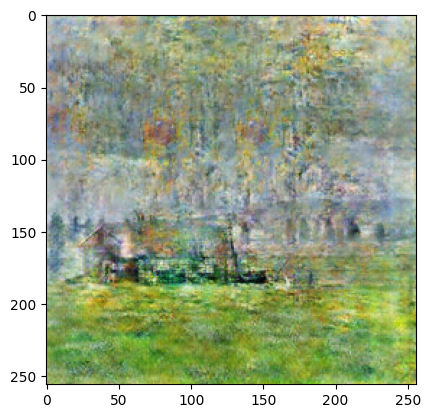

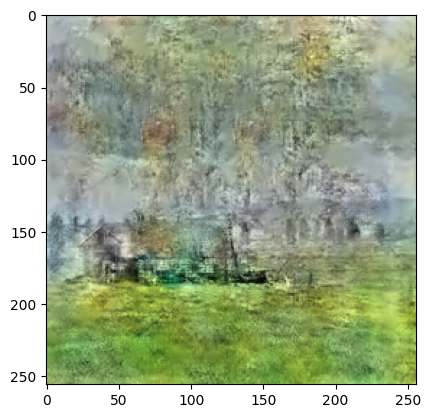

In [33]:
im = imageio.imread('test_images/generated_images/9.png')
new_im = get_image(9)
from matplotlib import pyplot as plt
plt.imshow(im)
plt.show()
plt.imshow(new_im)
plt.show()

### Save images

In [34]:
for i in range (1, 155):
    new_im = get_image(i)
    im = Image.fromarray(new_im)
    im.save("non_local_means_generated/images/" + str(i) + ".png")

/var/folders/l_/lrlqylsx5j1d7jprf6nrcwch0000gn/T/ipykernel_98440/2787511316.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('test_images/generated_images/' + str(i) + '.png')


### Run classifier

In [35]:
import tensorflow as tf

In [36]:
new_model = tf.keras.models.load_model('classification_model.h5')

In [37]:
def get_predictions(file_path, model):
    img_array = tf.keras.utils.image_dataset_from_directory(
                file_path)
    predictions = model.predict(img_array)
    predicted_labels = []
    for prediction in predictions:
        predicted_labels.append(np.argmax(prediction))
    return predicted_labels

In [38]:
non_local_means = get_predictions("non_local_means_generated", new_model)

Found 155 files belonging to 1 classes.
5/5 [==============================] - 1s 147ms/step


In [39]:
non_local_means.count(0) / (len(non_local_means))

0.7806451612903226